# Preprocessing data 

Questions:
* combine dataset or not

Beter om functies te maken van het preprocessen. I.v.m. out of memory. Dus niet de datasets samenvoegen, maar de preprocessing op beide toepassen.

* balance clickbool, bookbool - delete all 0 bookbools?

Ja, dat vond ze wel een goed idee, dat kan ook prima als we dus de sets gescheiden houden

* PCA wanneer je het weet, wat doe je er dan mee?

Dan reduceer je de features, maar omdat er weinig correlatie is en omdat er maar 2 features overblijven leek het haar niet heel nuttig. We kunnen het evt. wel vermelden in het report

* Position, Clickbool en bookbool zijn de targets toch?

Ja, dat klopt.



In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [35]:
df_train = pd.read_csv("data/training_set_VU_DM.csv")
df_test  = pd.read_csv("data/test_set_VU_DM.csv")


## Transform datetime

In [36]:
def transform_datetime(df_comb):    
    df_comb["date_time"] = pd.to_datetime(df_comb["date_time"])
    df_comb["year"] = df_comb["date_time"].dt.year
    df_comb["month"] = df_comb["date_time"].dt.month
    df_comb["day"] = df_comb["date_time"].dt.day

    df_comb = df_comb.drop(columns="date_time")
    return df_comb

df_train = transform_datetime(df_train) 
df_test  = transform_datetime(df_test)

## Remove outliers / exlcuding nan-columns

In [37]:
def remove_outliers(df_comb):    
    cols_missing = df_comb.columns[df_comb.isnull().any()].tolist()

    for col in df_comb.columns:
        if col not in cols_missing:
            Q1 = df_comb[col].quantile(0.25)
            Q3 = df_comb[col].quantile(0.75)
            IQR = Q3 - Q1
            upper_values = Q3 + 1.5 * IQR
            lower_values = Q1 - 1.5 * IQR
            # tried to follow this example, but it didn't work out: https://stackoverflow.com/questions/35827863/remove-outliers-in-pandas-dataframe-using-percentiles
            # df_train = df_train[~((df_train[col] < (Q1 - 1.5 * IQR)) |(df_train[col] > (Q3 + 1.5 * IQR))).any(axis=1)]
            to_be_removed = list(df_comb.loc[((df_comb[col] < lower_values) | (df_comb[col] > upper_values))].index)
            
    #for index in indices_to_remove:
    rows_to_be_removed = list(set(to_be_removed))
    df_comb = df_comb.drop(index=rows_to_be_removed, errors="ignore", axis=0)
    # display(df_train)
    return df_comb

df_train = remove_outliers(df_train)
df_test = remove_outliers(df_test)      

In [38]:
display(df_train)

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,year,month,day
0,1,12,187,NaN,NaN,219,893,3,3.5,1,...,NaN,0.0,0.0,NaN,0,NaN,0,2013,4,4
1,1,12,187,NaN,NaN,219,10404,4,4.0,1,...,NaN,0.0,0.0,NaN,0,NaN,0,2013,4,4
2,1,12,187,NaN,NaN,219,21315,3,4.5,1,...,NaN,0.0,0.0,NaN,0,NaN,0,2013,4,4
3,1,12,187,NaN,NaN,219,27348,2,4.0,1,...,NaN,-1.0,0.0,5.0,0,NaN,0,2013,4,4
4,1,12,187,NaN,NaN,219,29604,4,3.5,1,...,NaN,0.0,0.0,NaN,0,NaN,0,2013,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4958342,332785,5,219,NaN,NaN,219,77700,3,4.0,1,...,NaN,NaN,NaN,NaN,0,NaN,0,2013,6,30
4958343,332785,5,219,NaN,NaN,219,88083,3,4.0,1,...,NaN,NaN,NaN,NaN,0,NaN,0,2013,6,30
4958344,332785,5,219,NaN,NaN,219,94508,3,3.5,1,...,NaN,NaN,NaN,NaN,0,NaN,0,2013,6,30
4958345,332785,5,219,NaN,NaN,219,128360,3,5.0,1,...,NaN,NaN,NaN,NaN,1,157.84,1,2013,6,30


## Outlier detection / nan-columns

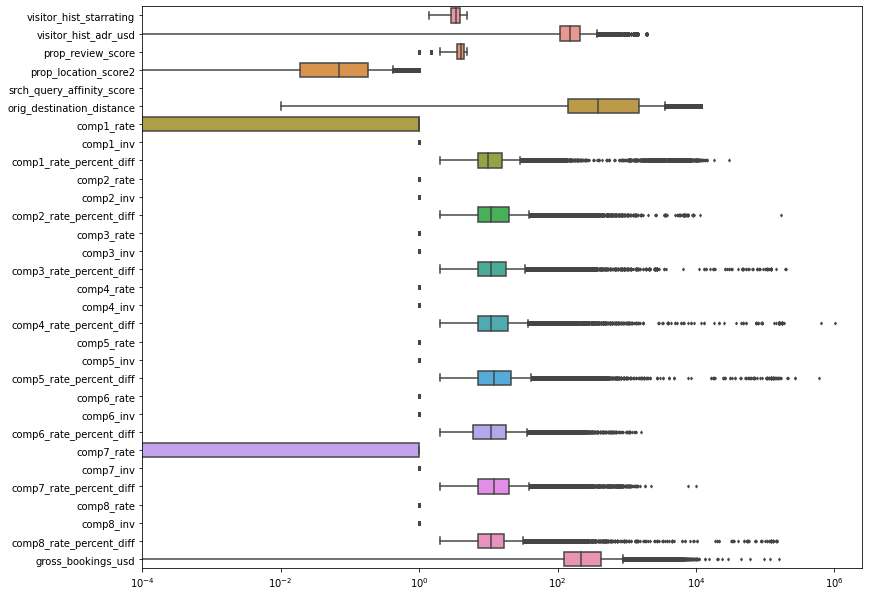

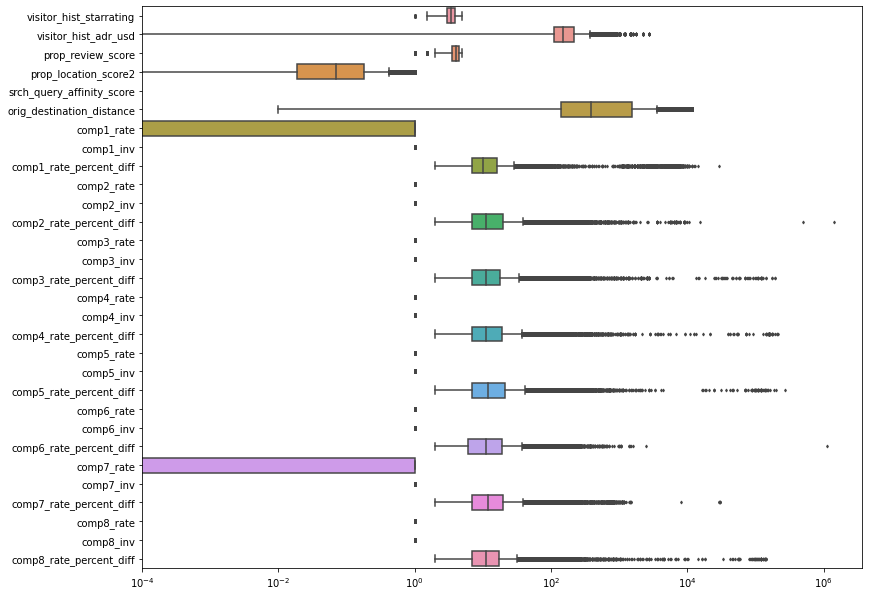

In [39]:
def outliers_detection(df_comb):
    # cols = [
    #         'prop_location_score2',
    #         'prop_location_score1',
    #         'srch_booking_window',
    #         'price_usd',
    #         'prop_historical_price',
    #         'orig_destination_distance',
    #         ]
    cols = df_comb.columns[df_comb.isnull().any()].tolist()
    fig, axarr = plt.subplots(figsize=(2000/120, 1200/120))
   # ax = df[cols].boxplot(rot=90, return_type="axes", sym='k.', showfliers=True)
    """
    train[cols].boxplot(vert=False, sym='k.')
    plt.xscale('log')
    """
    #vals = [x.dropna() for y,x in df[cols].iteritems()]
    ax = sns.boxplot(data=df_comb[cols], orient='h', fliersize=2)
    ax.set_xscale('log')
    plt.xlim(xmin=1e-4)
    plt.subplots_adjust(left=0.3, bottom=0.1)
    # plt.savefig("outliers", dpi=400)

outliers_detection(df_train)
outliers_detection(df_test) 
# outliers()

In [40]:
display(df_train)


,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,year,month,day
0,1,12,187,NaN,NaN,219,893,3,3.5,1,...,NaN,0.0,0.0,NaN,0,NaN,0,2013,4,4
1,1,12,187,NaN,NaN,219,10404,4,4.0,1,...,NaN,0.0,0.0,NaN,0,NaN,0,2013,4,4
2,1,12,187,NaN,NaN,219,21315,3,4.5,1,...,NaN,0.0,0.0,NaN,0,NaN,0,2013,4,4
3,1,12,187,NaN,NaN,219,27348,2,4.0,1,...,NaN,-1.0,0.0,5.0,0,NaN,0,2013,4,4
4,1,12,187,NaN,NaN,219,29604,4,3.5,1,...,NaN,0.0,0.0,NaN,0,NaN,0,2013,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4958342,332785,5,219,NaN,NaN,219,77700,3,4.0,1,...,NaN,NaN,NaN,NaN,0,NaN,0,2013,6,30
4958343,332785,5,219,NaN,NaN,219,88083,3,4.0,1,...,NaN,NaN,NaN,NaN,0,NaN,0,2013,6,30
4958344,332785,5,219,NaN,NaN,219,94508,3,3.5,1,...,NaN,NaN,NaN,NaN,0,NaN,0,2013,6,30
4958345,332785,5,219,NaN,NaN,219,128360,3,5.0,1,...,NaN,NaN,NaN,NaN,1,157.84,1,2013,6,30


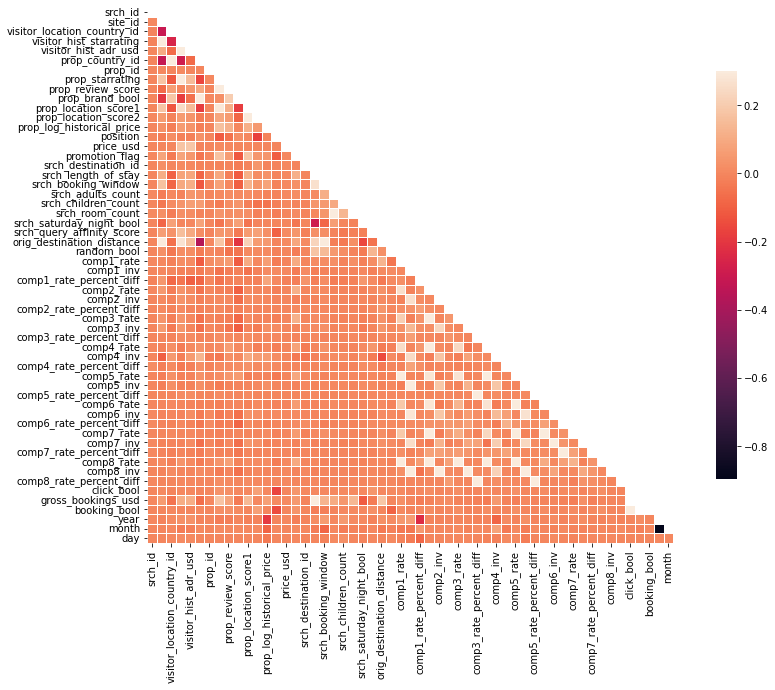

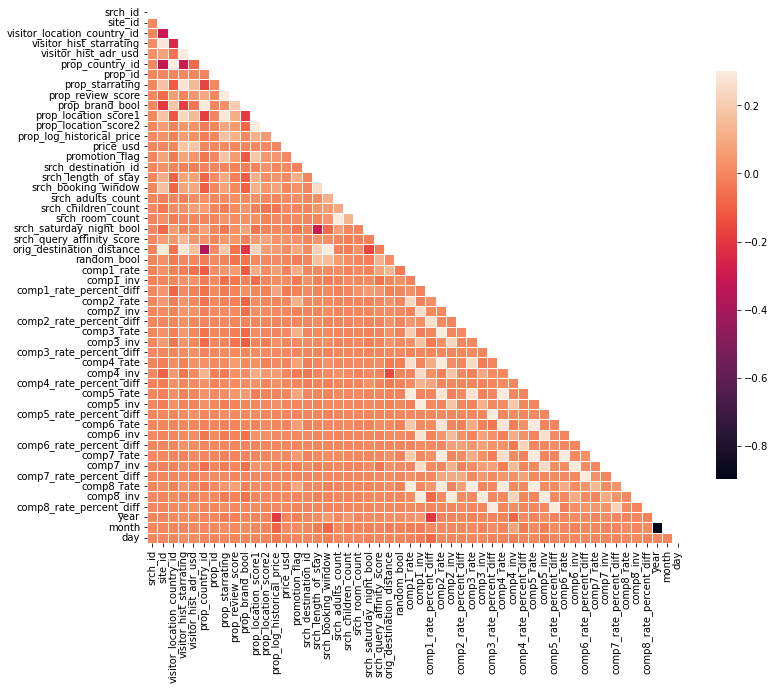

In [41]:
def create_correlation(df_comb):
    correlation = df_comb.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(correlation, dtype=bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(12, 15))

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(correlation, mask=mask, vmax=.3, square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
    plt.show()

create_correlation(df_train)
create_correlation(df_test) 



# def correlation_heatmap(df_comb):
#     correlations = df_comb.corr()

#     fig, ax = plt.subplots(figsize=(10,10))
#     sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
#                 square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
#     plt.show()
    
# correlation_heatmap(df_train)

## Fill missing values

In [42]:
display(df_train)

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,year,month,day
0,1,12,187,NaN,NaN,219,893,3,3.5,1,...,NaN,0.0,0.0,NaN,0,NaN,0,2013,4,4
1,1,12,187,NaN,NaN,219,10404,4,4.0,1,...,NaN,0.0,0.0,NaN,0,NaN,0,2013,4,4
2,1,12,187,NaN,NaN,219,21315,3,4.5,1,...,NaN,0.0,0.0,NaN,0,NaN,0,2013,4,4
3,1,12,187,NaN,NaN,219,27348,2,4.0,1,...,NaN,-1.0,0.0,5.0,0,NaN,0,2013,4,4
4,1,12,187,NaN,NaN,219,29604,4,3.5,1,...,NaN,0.0,0.0,NaN,0,NaN,0,2013,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4958342,332785,5,219,NaN,NaN,219,77700,3,4.0,1,...,NaN,NaN,NaN,NaN,0,NaN,0,2013,6,30
4958343,332785,5,219,NaN,NaN,219,88083,3,4.0,1,...,NaN,NaN,NaN,NaN,0,NaN,0,2013,6,30
4958344,332785,5,219,NaN,NaN,219,94508,3,3.5,1,...,NaN,NaN,NaN,NaN,0,NaN,0,2013,6,30
4958345,332785,5,219,NaN,NaN,219,128360,3,5.0,1,...,NaN,NaN,NaN,NaN,1,157.84,1,2013,6,30


<AxesSubplot:>

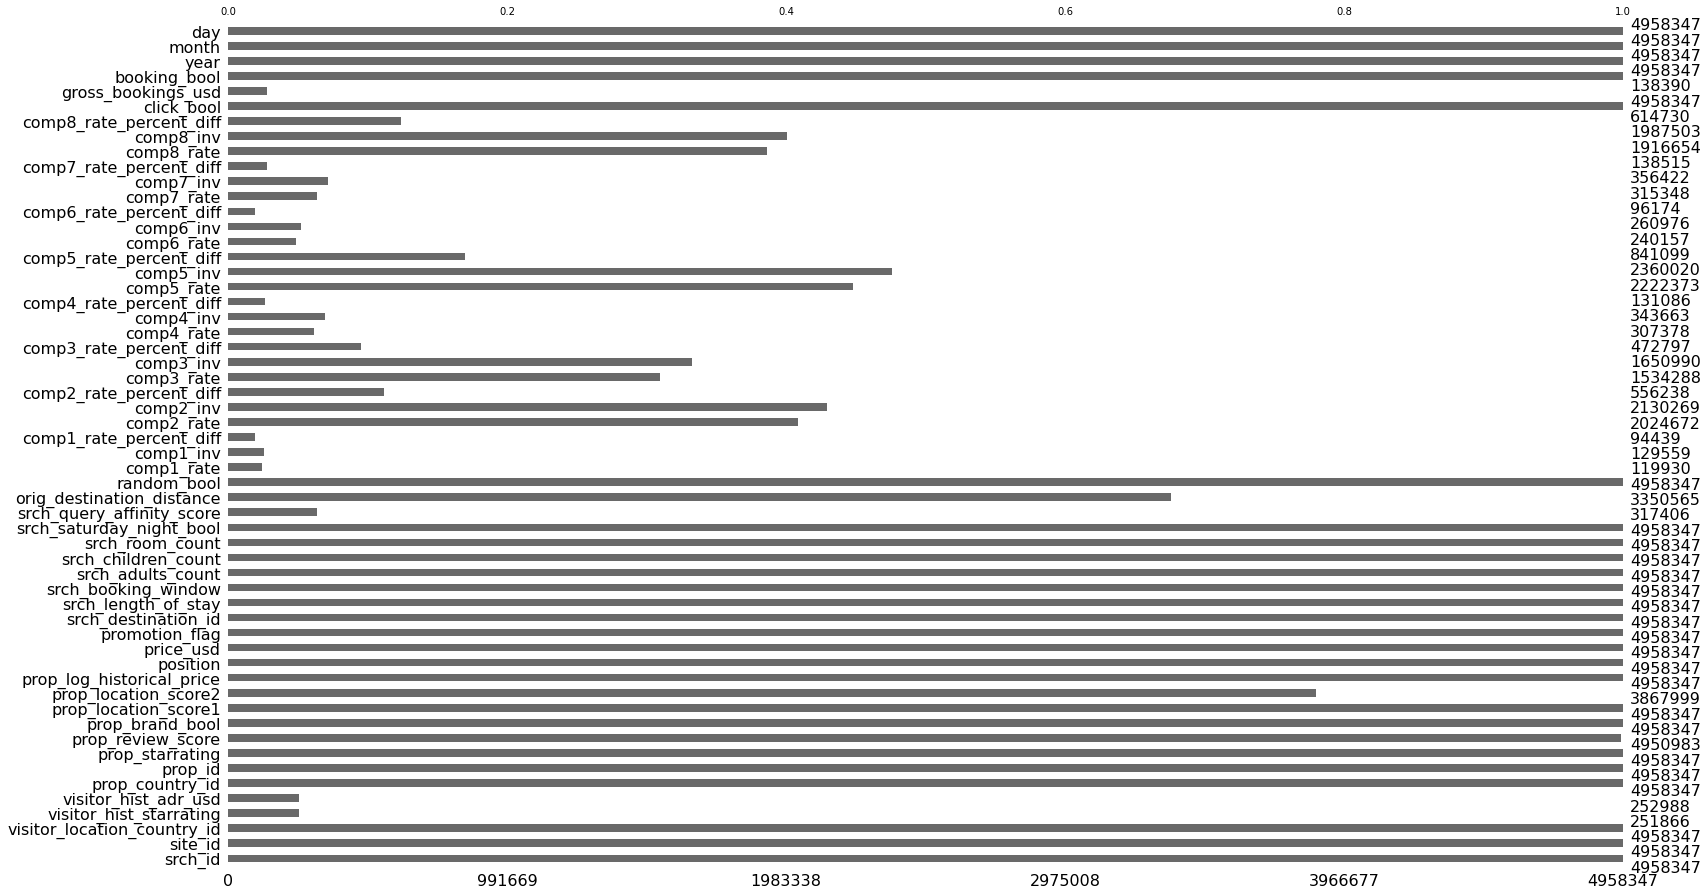

In [43]:
import missingno as msno
msno.bar(df_train)

<AxesSubplot:>

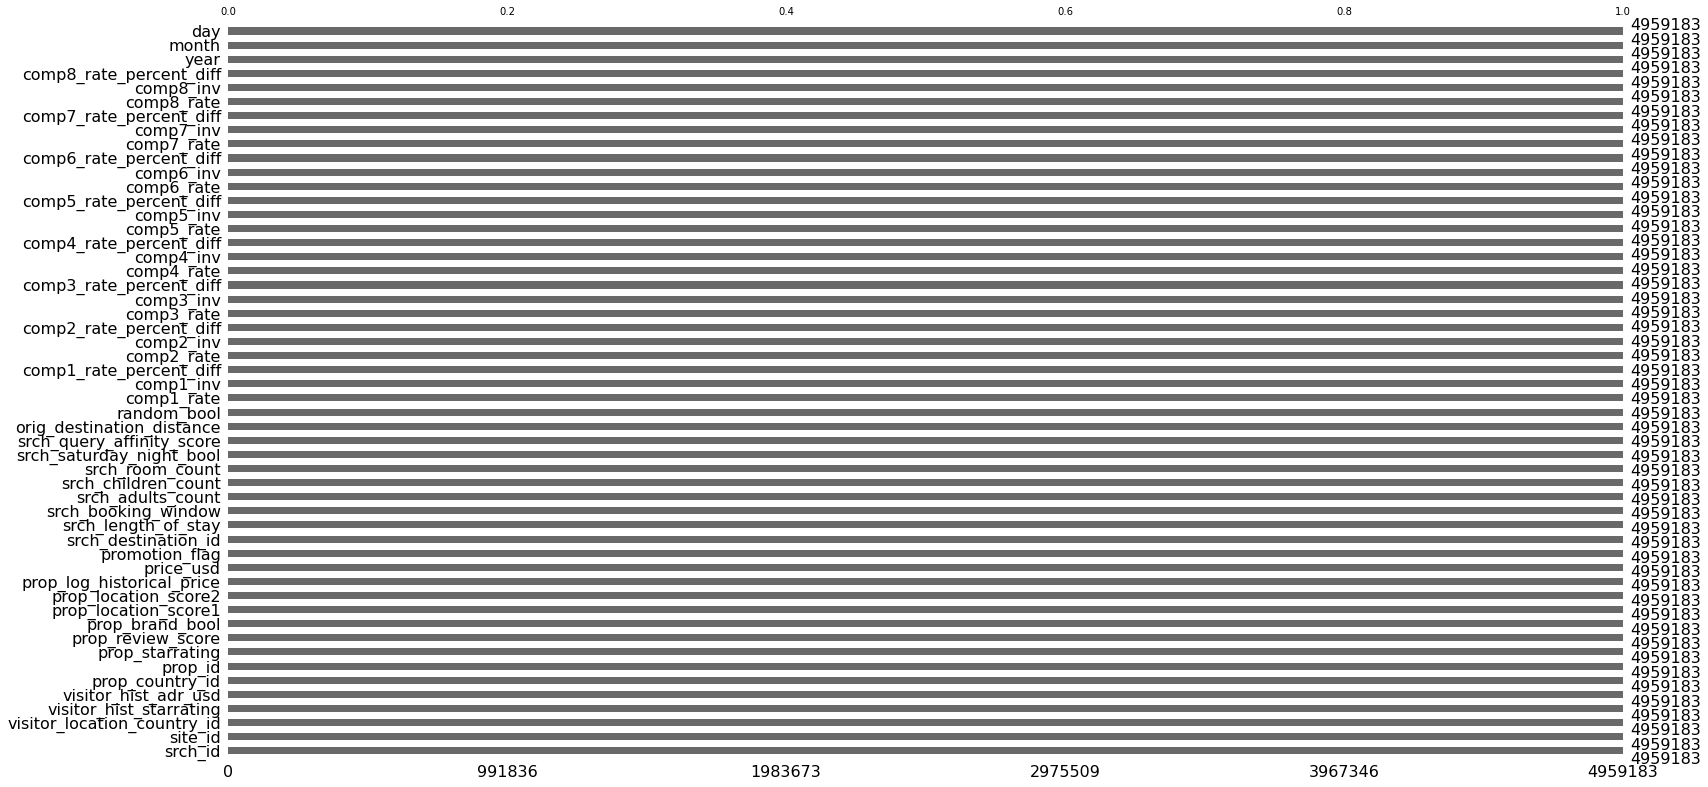

In [49]:
import missingno as msno
# msno.bar(df_train)
msno.bar(df_test)


## Missing variables

### Hotel descriptions

These missing value estimations come from Jung Wang's solutions. People do not like booking hotels with missing information, this should be reflected in our trainingdata. In the missing value plot you can see that:

["prop_review_score", "prop_location_score2", "srch_query_affinity_score"] 

are missing values. These three variables can be catagorized as variables describing the hotel. We will set the missing variables of these values to 0. 

### orig_destination_distance

Other papers have indicated the importance of this feature https://arxiv.org/pdf/1908.07498.pdf. We therefore try and find a solution for it. In the paper they use a technique called: Distance Matrix Completion. The idea behind this is that we often know the current location of the user and the location of the hotel. However we don't have access to the actual meaning of the location id's of the data (as far as I know). In this technique we use the limited amount of data we have at orig_destination_distance to interpolate / calculate the distances of the instances we don't have. For the cases which we can't make an educated guess about the distance we take the average.

## Other variables

We are now left with three catagories of missing values: 

* gross_booking_usd: What did the transaction cost? ( 0 ?) -- If the booking bool is 0, we should set this var to 0 otherwise we should find another data. 
* Competitor values: Are the competitors cheaper, similar or more expensive in price (rate), does the competitor have the hotel available or not (inv), the percentual difference (diff)
* Visitor history: What rating has the user bought before (starrating), what have they paid for it? (adr_usd) We are lacking almost all data for these features. Because we're missing this much data, we should probably drop these features.

Owen Zhang just sets all the missing values to -1... This makes sense for at least comp rate and comp inv, because it is the worst case scenario (Jung Wang sets them to 0, this could be possible as well). 
Team Bingshu (3rd prize) just uses the first quartile to represent the missing data.

* Position: We need to decide if we want to keep this variable, as it may cause overfitting..

In [50]:

# Calculate distance between visitor and hotel
# INTERESANT: visitor_location_country_id != prop_country and orig_destination_distance != NaN

# Reset indices
#df_unique_ids.reset_index(drop = True, inplace = True)
#df_location.reset_index(drop = True, inplace = True)
def fill_missing_values(df_comb):
        # ["prop_review_score", "prop_location_score2", "srch_query_affinity_score"]
        df_comb["prop_review_score"] = df_comb["prop_review_score"].fillna(value=0)
        df_comb["prop_location_score2"] = df_comb["prop_location_score2"].fillna(value=0)
        df_comb["srch_query_affinity_score"] = df_comb["srch_query_affinity_score"].fillna(value=0)


        df_location = df_comb[["srch_id", "visitor_location_country_id" ,"orig_destination_distance","prop_country_id"]] # These are the features we're interested in ATM

        df_location["country_id"] = np.power(df_location["visitor_location_country_id"],2) + np.power(df_location["prop_country_id"],3) # Create a unique ID based on the home country and the hotel country combination
        df_unique_ids = pd.DataFrame()
        df_unique_ids = df_location.groupby(by="country_id", as_index=False)["orig_destination_distance"].mean() # Get the mean distance between those countries # Ex: US <--> France
        df_comb["country_id"] = np.power(df_location["visitor_location_country_id"],2) + np.power(df_location["prop_country_id"],3) # Now create this same ID for the train DataFrame
        df_comb = df_comb.set_index("country_id") # We need to set the indices because otherwise we can't fill NA based on certain values
        df_unique_ids = df_unique_ids.set_index("country_id")
        df_comb.fillna(df_unique_ids["orig_destination_distance"]) # Fill the missing data with the data we allready know

        # We've filled in about 4.000 missing values in orig_destination_distance, it's not much, but it's something. 
        df_location = df_comb[["srch_id", "visitor_location_country_id" ,"orig_destination_distance","prop_country_id"]].drop_duplicates()
        # In this step we're filling in the missing "orig_destination_distance" values in with the median from the current values
        df_comb['orig_destination_distance'].fillna((df_comb['orig_destination_distance'].median()), inplace=True)

        # Drop visitor_hist_starrating and visitor_hist_adr_usd because of the amount of data which is lacking in these features
        df_comb = df_comb.drop(columns=["visitor_hist_starrating", "visitor_hist_adr_usd"])

        # finally fill in all the other variables with -1
        df_comb = df_comb.fillna(value=-1)
        
        return df_comb

df_train = fill_missing_values(df_train)
df_test  = fill_missing_values(df_test)

C:\Users\sheep\AppData\Local\Temp/ipykernel_2956/2071991744.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_location["country_id"] = country_id # Create a unique ID based on the home country and the hotel country combination


ValueError: 'country_id' is both an index level and a column label, which is ambiguous.

## Balance dataset between clicked and not-clicked items

In [46]:
#balancing dataset
click_indices = df_train[df_train.click_bool == 1].index
random_indices = np.random.choice(click_indices, len(df_train.loc[df_train.click_bool == 1]), replace=False)
click_sample = df_train.loc[random_indices]

not_click = df_train[df_train.click_bool == 0].index
random_indices = np.random.choice(not_click, sum(df_train['click_bool']), replace=False)
not_click_sample = df_train.loc[random_indices]

df_train = pd.concat([not_click_sample, click_sample], axis=0)

print("Percentage of not click impressions: ", len(df_train[df_train.click_bool == 0])/len(df_train))
print("Percentage of click impression: ", len(df_train[df_train.click_bool == 1])/len(df_train))
print("Total number of records in resampled data: ", len(df_train))

KeyboardInterrupt: 

## Balance dataset between booked and not-booked items

In [ ]:
#balancing dataset
book_indices = df_train[df_train.booking_bool == 1].index
random_indices = np.random.choice(book_indices, len(df_train.loc[df_train.booking_bool == 1]), replace=False)
book_sample = df_train.loc[random_indices]

not_booked = df_train[df_train.booking_bool == 0].index
random_indices = np.random.choice(not_booked, sum(df_train['booking_bool']), replace=False)
not_booked_sample = df_train.loc[random_indices]

df_train = pd.concat([not_booked_sample, book_sample], axis=0)

print("Percentage of not booked impressions: ", len(df_train[df_train.booking_bool == 0])/len(df_train))
print("Percentage of booked impression: ", len(df_train[df_train.booking_bool == 1])/len(df_train))
print("Total number of records in resampled data: ", len(df_train))

NameError: name 'df_comb' is not defined

## Feature Engineering

Here are some feature engineering ideas found in the presentations of the three winners or at other sources online:

* sdahsadf

## Standardization or Normalization?
Standardization or normalization can be greatly benficial for ML. Which of the two to choose? I'm reading this blogpost to learn more: https://towardsdatascience.com/normalization-vs-standardization-quantitative-analysis-a91e8a79cebf
Furthermore, if we want to apply Principal Component Analysis to either optimize our data or reduce our dimensionality, our data needs to be (standardized / optimized). The question becomes, which method to apply. The blogpost indicates that every dataset can benifit from different standardisation techniques and then not every technique goes well with every type of model. One option could be to run a model selection combined with various standardization techniques on a subset of the trainingdata, to then choose a best model to train our data on. Another blogpost: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

To this end we've decided we'll make a model selection pipeline in combination with standardization / normalization selection. We'll use a subset of the trainingdata for this  

In [ ]:
from sklearn import preprocessing

def normalize(df_comb):
    # The features which should not be standardized:
    neg_features = ["booking_bool", "click_bool", "srch_id", "year", "month", "site_id", "visitor_location_country_id", "prop_country_id", "prop_id", "prop_brand_bool", "promotion_flag", "srch_destination_id", "srch_saturday_night_bool", "random_bool"]
    features_to_normalize = df_comb[df_comb.columns.difference(neg_features)]
    # Apply the normalizer / standardizer on the relevant data. Optionally make a function to try out different normalizers / standardizers
    normalized_features = preprocessing.StandardScaler().fit_transform(features_to_normalize)
    # Combine the df with the normalized features with the df without normalization
    df_comb_normalized = df_comb
    df_comb_normalized[features_to_normalize.columns] = normalized_features
    return df_comb_normalized

df_train = normalize(df_train)
df_test  = normalize(df_test)

In [ ]:
print(df_train.shape)
print(df_test.shape)


(4958347, 56)
(4959183, 52)


In [ ]:
display(df_train)

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,year,month,day
country_id,,,,,,,,,,,,,,,,,,,,,
10538428,1,12,187,-0.228338,-0.196899,219,893,-0.171762,-0.256862,1,...,-0.058901,1.174356,1.163908,-0.009205,0,-0.071444,0,2013,4,-1.343283
10538428,1,12,187,-0.228338,-0.196899,219,10404,0.779692,0.215022,1,...,-0.058901,1.174356,1.163908,-0.009205,0,-0.071444,0,2013,4,-1.343283
10538428,1,12,187,-0.228338,-0.196899,219,21315,-0.171762,0.686906,1,...,-0.058901,1.174356,1.163908,-0.009205,0,-0.071444,0,2013,4,-1.343283
10538428,1,12,187,-0.228338,-0.196899,219,27348,-1.123215,0.215022,1,...,-0.058901,-0.669247,1.163908,0.009808,0,-0.071444,0,2013,4,-1.343283
10538428,1,12,187,-0.228338,-0.196899,219,29604,0.779692,-0.256862,1,...,-0.058901,1.174356,1.163908,-0.009205,0,-0.071444,0,2013,4,-1.343283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10551420,332785,5,219,-0.228338,-0.196899,219,77700,-0.171762,0.215022,1,...,-0.058901,-0.669247,-0.791692,-0.009205,0,-0.071444,0,2013,6,1.651486
10551420,332785,5,219,-0.228338,-0.196899,219,88083,-0.171762,0.215022,1,...,-0.058901,-0.669247,-0.791692,-0.009205,0,-0.071444,0,2013,6,1.651486
10551420,332785,5,219,-0.228338,-0.196899,219,94508,-0.171762,-0.256862,1,...,-0.058901,-0.669247,-0.791692,-0.009205,0,-0.071444,0,2013,6,1.651486


In [ ]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler, RobustScaler, QuantileTransformer, \
    PowerTransformer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


models = [
        ('LR', LogisticRegression()),
        ('LDA', LinearDiscriminantAnalysis()),
        ('KNN', KNeighborsClassifier()),
        # ('CART', DecisionTreeClassifier(random_state=seed)),
        ('NB', GaussianNB()),
        # ('SVM', SVC(random_state=seed, probability=True)),
        # ('RF', RandomForestClassifier(max_depth=3, random_state=seed)),
        # ('MLP', MLPClassifier(random_state=seed))
        ]
for model in models:
    print(model[0])
    

LR
LDA
KNN
NB


## LGBM model

In [ ]:
# cols = df_train.columns[df_train].tolist()

    # cols_missing = df_comb.columns[df_comb.isnull().any()].tolist()
columns_list = []
for col in df_train.columns:
    if col != 'prop_id':
    # print(col)
        columns_list.append(col)
print(columns_list)



['srch_id', 'site_id', 'visitor_location_country_id', 'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool', 'prop_location_score1', 'prop_location_score2', 'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag', 'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count', 'srch_children_count', 'srch_room_count', 'srch_saturday_night_bool', 'srch_query_affinity_score', 'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv', 'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv', 'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv', 'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv', 'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv', 'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv', 'comp7_rate_percent_diff', 'comp8_rate', 'comp8_inv', 'comp8_rate_percent_diff', 'click_bool', 'gross_bookings_us

In [ ]:
from sklearn.model_selection import train_test_split
import lightgbm as lgbm


# train, test = train_test_split(dataset, test_size=0.2, random_state=25)

# features_train = ['activity', 'appCat.values', 'call', 'circumplex.values', 'screen', 'sms']

features_train = []
for col in df_train.columns:
    if col != 'prop_id':
    # print(col)
        features_train.append(col)
print(features_train)
target_train = 'prop_id'

X_train, X_val, y_train, y_val = train_test_split(
    df_train[features_train], df_train[target_train], test_size=0.2)

train_data = lgbm.Dataset(X_train, label=y_train)

val_data = lgbm.Dataset(X_val, label=y_val)

['srch_id', 'site_id', 'visitor_location_country_id', 'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool', 'prop_location_score1', 'prop_location_score2', 'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag', 'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count', 'srch_children_count', 'srch_room_count', 'srch_saturday_night_bool', 'srch_query_affinity_score', 'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv', 'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv', 'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv', 'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv', 'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv', 'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv', 'comp7_rate_percent_diff', 'comp8_rate', 'comp8_inv', 'comp8_rate_percent_diff', 'click_bool', 'gross_bookings_us

[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.291315 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	valid_0's l2: 1.64985e+09
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l2: 1.64953e+09
[3]	valid_0's l2: 1.64816e+09
[4]	valid_0's l2: 1.64701e+09
[5]	valid_0's l2: 1.64593e+09
[6]	valid_0's l2: 1.64412e+09
[7]	valid_0's l2: 1.64371e+09
[8]	valid_0's l2: 1.64293e+09
[9]	valid_0's l2: 1.6425e+09
[10]	valid_0's l2: 1.64136e+09
[11]	valid_0's l2: 1.6401e+09
[12]	valid_0's l2: 1.63906e+09
[13]	valid_0's l2: 1.63885e+09
[14]	valid_0's l2: 1.63845e+09
[15]	valid_0's l2: 1.63755e+09
[16]	valid_0's l2: 1.63713e+09
[17]	valid_0's l2: 1.63688e+09
[18]	valid_0's l2: 1.63577e+09
[19]	valid_0's l2: 1.63495e+09
[20]	valid_0's l2

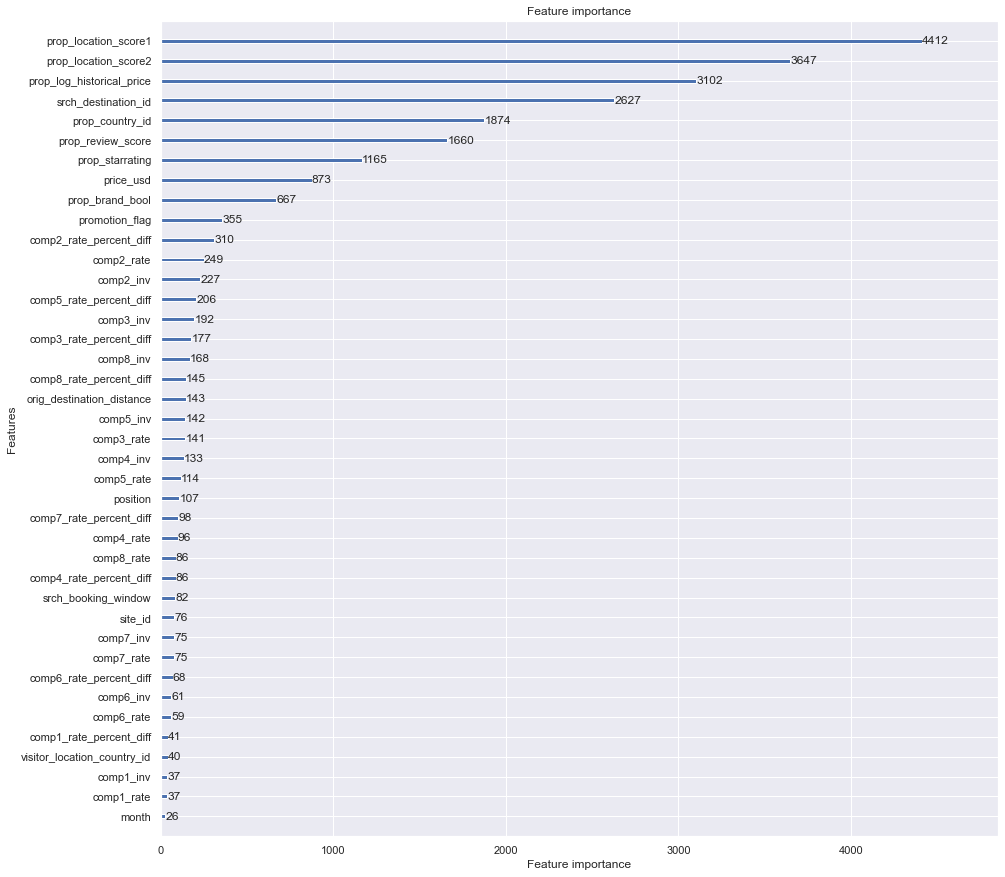

In [ ]:
# determine style
sns.set_theme(style="darkgrid")

#basic parameter:
parameters = {
    # 'application': 'binary',
    # 'objective': 'binary',
    'metric': 'mse',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 25,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0
}

# determine model
model = lgbm.train(parameters,
                       train_data,
                       valid_sets=val_data,
                       num_boost_round=1000,
                       early_stopping_rounds=100)

# plot and show feature importance
ax = lgbm.plot_importance(model, max_num_features=40, figsize=(15, 15))
plt.show()

In [ ]:
hyper_params = {
    'random_state': 420,
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['mse'],
    'learning_rate': 0.1,
    "num_leaves": 256,
    'max_depth': 9,
    # 'min_data_in_leaf': 70,
    # "max_bin": 512,
}

train_data = lgbm.Dataset(X_train, label=y_train, categorical_feature='auto')
val_data = lgbm.Dataset(X_val, label=y_val, categorical_feature='auto')

model = lgbm.train(hyper_params, train_data, num_boost_round=500, verbose_eval=False)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.447234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4367
[LightGBM] [Info] Number of data points in the train set: 3966677, number of used features: 55
[LightGBM] [Info] Start training from score 70062.157964
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [ ]:
y_pred = model.predict(X_val[features_train])

predictions = pd.DataFrame({'predicted': y_pred, 'actual': y_val})

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse_lgbm = mean_squared_error(predictions['actual'], predictions['predicted'])
mae_lgbm = mean_absolute_error(predictions['actual'], predictions['predicted'])
rmse_lgbm = np.sqrt(mean_squared_error(predictions['actual'], predictions['predicted']))

print(f"MSE is: {mse_lgbm}")
print(f"MAE is: {mae_lgbm}")
print(f"RMSE is: {rmse_lgbm}")

MSE is: 1066437494.3862429
MAE is: 26802.778336871237
RMSE is: 32656.354578952054


In [ ]:
# from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.linear_model import Lasso,LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

par_xgbc = {
            #   'tree_method': 'gpu_hist', 
              'objective':'multi:softmax',
              'num_class': 100,
              'learning_rate': 0.08,
              'max_depth': 8,
              'min_child_weight': 9,
              'silent': 1,
              'subsample': 0.8,
              'colsample_bytree': 0.7,
              'n_estimators': 600,
              'seed': 42
}

XGBC = xgb.XGBClassifier(**par_xgbc)
Las = Lasso()
LinR = LinearRegression()
Rid = Ridge()
Rfc = RandomForestRegressor(random_state=2)
Dtc = DecisionTreeRegressor(random_state = 2)
Boost_Lin = AdaBoostRegressor(base_estimator=LinR,random_state=2)
Boost_las = AdaBoostRegressor(base_estimator=Las,random_state=2)
Boost_rid = AdaBoostRegressor(base_estimator=Rid,random_state=2)
Bg_Lin = BaggingRegressor(base_estimator=LinR,random_state=2)
Bg_las = BaggingRegressor(base_estimator=Las,random_state=2)
Bg_rid = BaggingRegressor(base_estimator=Rid,random_state=2)

In [ ]:


origin_features = []
for col in df_train.columns:
    if col != 'prop_id':
    # print(col)
        origin_features.append(col)
print(origin_features)
target_train = 'prop_id'

# using the full set for training
training_set = df_train[origin_features + [target_train]].sample(500)

# separating the variable that is to be predicted by the model from the rest
X = training_set.drop(target_train, axis=1)
y = training_set[target_train]

features = X.columns

# built a validation set on flights_train
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

['srch_id', 'site_id', 'visitor_location_country_id', 'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool', 'prop_location_score1', 'prop_location_score2', 'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag', 'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count', 'srch_children_count', 'srch_room_count', 'srch_saturday_night_bool', 'srch_query_affinity_score', 'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv', 'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv', 'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv', 'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv', 'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv', 'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv', 'comp7_rate_percent_diff', 'comp8_rate', 'comp8_inv', 'comp8_rate_percent_diff', 'click_bool', 'gross_bookings_us

In [ ]:
model_columns = []
models_compare = pd.DataFrame(columns = model_columns)
results=[]

row_index = 0
for model, name in zip([XGBC, Las,LinR,Rid,Dtc,Rfc,Boost_Lin,Boost_las,Boost_rid,Bg_Lin,Bg_las,Bg_rid], 
     ['XGBC','Lasso','Linear Regression','Ridge','Random forest Regressor','Decision Tree Regressor','Boosted Linear',
      'Boosted Lasso','Boosted Ridge','Bagged Linear','Bagged Lasso','Bagged Ridge']):

    model1 = model.fit(X_train,y_train)
    Y_predict = model1.predict(X_val)
    results.append(Y_predict)
    mae_score = mean_absolute_error(y_val, Y_predict)
    mse_score = mean_squared_error(y_val, Y_predict)
    rmse_score = np.sqrt(mean_squared_error(y_val, Y_predict))
    models_compare.loc[row_index,'Model Name'] = name
    models_compare.loc[row_index, 'MAE'] = mae_score
    models_compare.loc[row_index, 'MSE'] = mse_score
    models_compare.loc[row_index, 'RMSE'] = rmse_score   
    row_index+=1

models_compare.sort_values(by = ['MSE'], ascending = True, inplace = True)    
models_compare

[11:10:54] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:10:55] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/rinusvangrunsven/opt/anaconda3/envs/dspa2/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 297441872432.32635, tolerance: 86769988.257996
  positive)
/Users/rinusvangrunsven/opt/anaconda3/envs/dspa2/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 298758668637.3701, tolerance: 85774177.819551
  positive)
/Users/rinusvangrunsven/opt/anaconda3/envs/dspa2/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 336355900091.11395, tolerance: 96983890.65083101
  positive)
/Users/rinusvangrunsven/opt/anaconda3/envs/dspa2/lib/python3.6/site-packages/sklearn/linear_model/_coo

,Model Name,MAE,MSE,RMSE
5,Decision Tree Regressor,32549.512600,1.538157e+09,39219.340640
3,Ridge,34055.107589,1.674288e+09,40918.069829
6,Boosted Linear,34815.124790,1.716406e+09,41429.531611
11,Bagged Ridge,34235.340923,1.734738e+09,41650.190716
8,Boosted Ridge,34506.140389,1.734901e+09,41652.143961
1,Lasso,35032.470771,1.752057e+09,41857.582008
2,Linear Regression,35045.043893,1.754816e+09,41890.524215
7,Boosted Lasso,35447.339734,1.764363e+09,42004.321142
10,Bagged Lasso,36522.958449,2.101297e+09,45839.907059
9,Bagged Linear,36670.503607,2.123063e+09,46076.703579


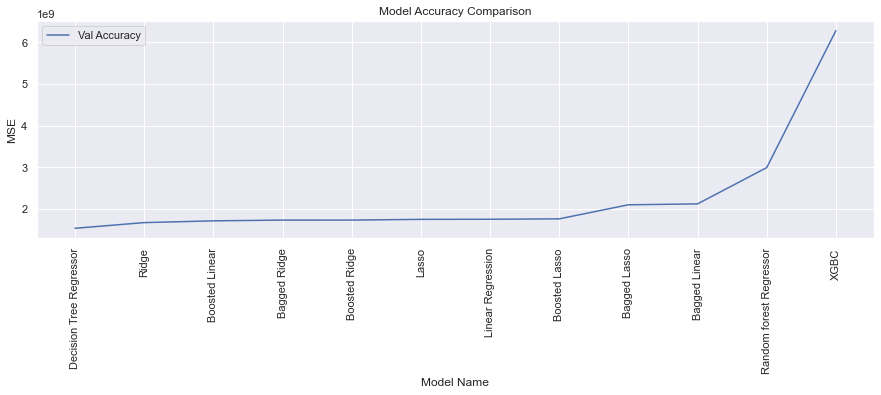

In [ ]:
plt.subplots(figsize=(15,4))
sns.lineplot(x="Model Name", y="MSE",data=models_compare,label='Val Accuracy')
# sns.lineplot(x="Model Name", y="Model Test Accuracy",data=models_compare,label='Test Accuracy')
plt.xticks(rotation=90)
plt.title('Model Accuracy Comparison')
plt.legend()
plt.savefig('models/output_models.png')
plt.show()